In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"Data/adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Calculating total null values
data.isna().sum() 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [6]:
data['workclass'] = data['workclass'].replace({'?': 'Others'})
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [7]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [8]:
data["occupation"] = data["occupation"].replace({'?':'Others'})
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [9]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [10]:
print(data.relationship.value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [11]:
print(data.gender.value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


In [12]:
data.shape

(48811, 15)

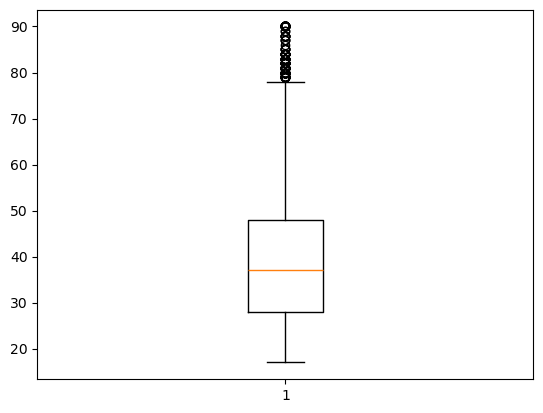

In [13]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [14]:
data=data[(data['age']<=75)&(data['age']>=17)]

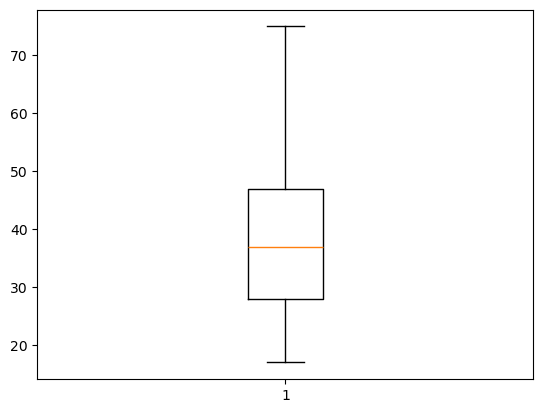

In [15]:
plt.boxplot(data['age'])
plt.show()

In [16]:
data.shape

(48438, 15)

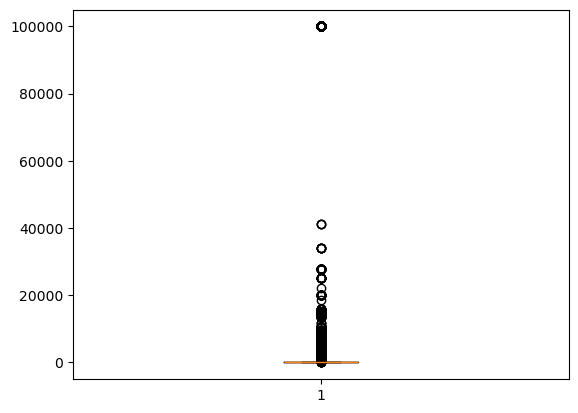

In [17]:
plt.boxplot(data['capital-gain'])
plt.show()

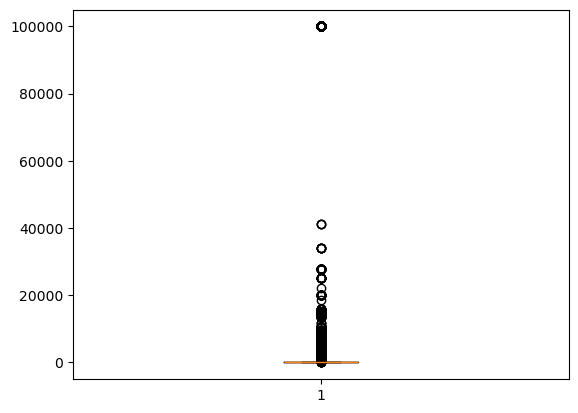

In [18]:
plt.boxplot(data['capital-gain'])
plt.show()

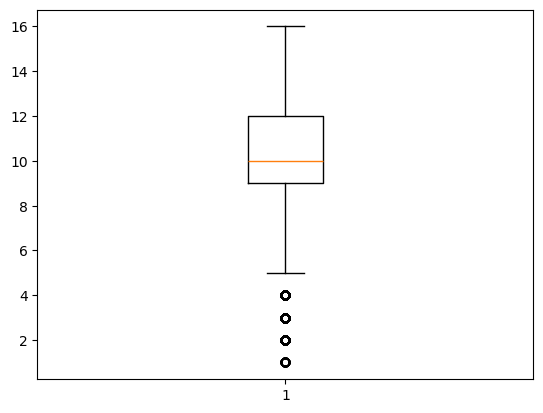

In [19]:
plt.boxplot(data['educational-num'])
plt.show()

In [20]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

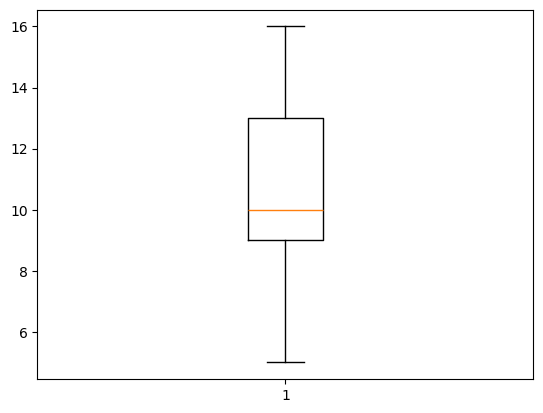

In [21]:
plt.boxplot(data['educational-num'])
plt.show()

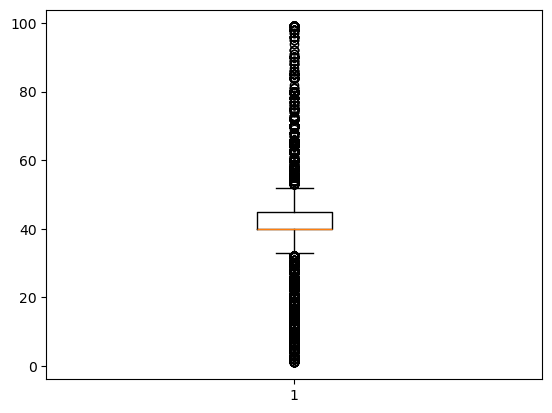

In [22]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [30]:
data=data.drop("relationship", axis = 1) #redundant feature

In [31]:
data

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,Others,Some-college,Never-married,Others,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
48839,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
48840,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


In [32]:
data.to_csv("adult_processed.csv", index = False)

In [27]:
from sklearn.preprocessing import LabelEncoder  
encoder=LabelEncoder()                       
data['workclass']=encoder.fit_transform(data['workclass']) 
data['marital-status']=encoder.fit_transform(data['marital-status']) 
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])  
data['race']=encoder.fit_transform(data['race'])  
data['gender']=encoder.fit_transform(data['gender'])    
data['native-country']=encoder.fit_transform(data['native-country'])

data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K


In [28]:
x=data.drop(columns=['income'])
y=data['income']
x.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.set_params(model=model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']

  
    results[name] = {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8149
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7010
        >50K       0.69      0.46      0.55      2334

    accuracy                           0.81      9344
   macro avg       0.77      0.70      0.72      9344
weighted avg       0.80      0.81      0.80      9344

RandomForest Accuracy: 0.8490
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.73      0.62      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.84      0.85      0.84      9344

KNN Accuracy: 0.8245
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7010
        >50K       0.67      0.60      0.63      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.75      0.

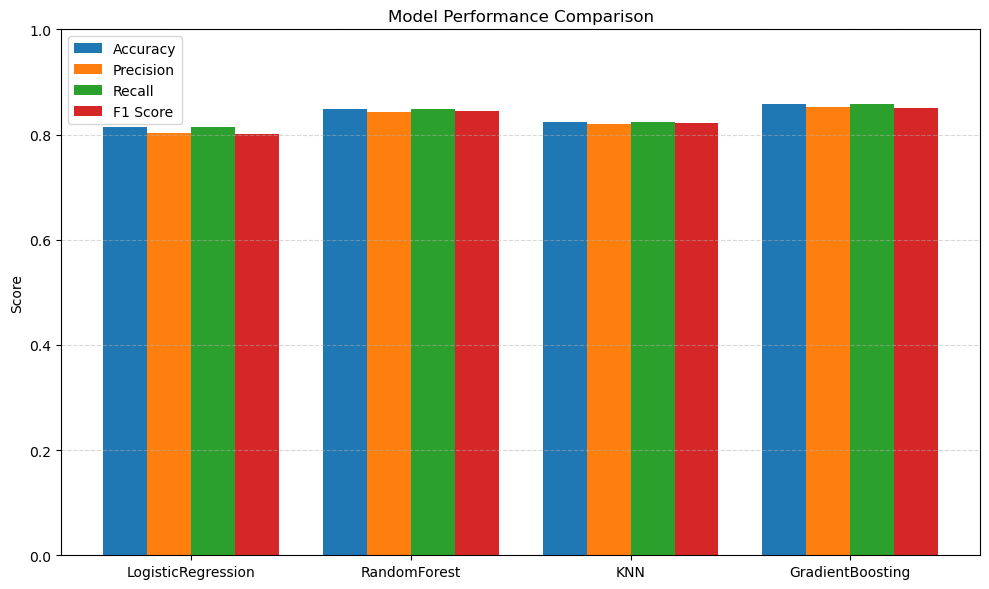

In [30]:
import matplotlib.pyplot as plt
import numpy as np

model_names = list(results.keys())
accuracy = [results[m]['accuracy'] for m in model_names]
precision = [results[m]['precision'] for m in model_names]
recall = [results[m]['recall'] for m in model_names]
f1 = [results[m]['f1'] for m in model_names]

x = np.arange(len(model_names))  # label locations
width = 0.2  # bar width

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Performance Comparison")
plt.xticks(x, model_names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


As we can see, GradientBoosting is best model with better f1 score and accuracy

In [34]:
best_model = max(results, key=lambda x: results[x]['f1'])  # or 'accuracy', 'recall'
print(f"Best model based on F1 Score: {best_model}")
print("Metrics:", results[best_model])


Best model based on F1 Score: GradientBoosting
Metrics: {'accuracy': 0.8571275684931506, 'precision': 0.8514922836515417, 'recall': 0.8571275684931506, 'f1': 0.8505062317410599}


In [38]:
from sklearn.model_selection import GridSearchCV

best_model_obj = models[best_model]  # from earlier models dict

param_grid = {
        "model__n_estimators": [100, 200],
        "model__max_depth": [3, 5],
        "model__min_samples_split": [2, 5]
}

pipe.set_params(model=best_model_obj)

# Run GridSearch
gs = GridSearchCV(pipe, param_grid, cv=3, scoring='f1_weighted', verbose=2)
gs.fit(X_train, y_train)

from sklearn.metrics import classification_report, accuracy_score

y_pred = gs.best_estimator_.predict(X_test)

print("\nPerformance on Test Set:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Save the best estimator
import joblib
joblib.dump(gs.best_estimator_, "Employee_Salary_Predict.pkl")
print("Tuned model saved as best_model_tuned.pkl")



Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=100; total time=   3.3s
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=100; total time=   3.3s
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=100; total time=   3.0s
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=200; total time=   6.3s
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=200; total time=   6.4s
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=200; total time=   6.0s
[CV] END model__max_depth=3, model__min_samples_split=5, model__n_estimators=100; total time=   3.4s
[CV] END model__max_depth=3, model__min_samples_split=5, model__n_estimators=100; total time=   3.3s
[CV] END model__max_depth=3, model__min_samples_split=5, model__n_estimators=100; total time=   3.0s
[CV] END model__max_depth=3, mo

In [33]:
!pip install streamlit

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 1.4 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/9.9 MB 1.6 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.9 MB 1.8 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.9 MB 1.9 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/9.9 MB 2.0 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.9 MB 2.0 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.9 MB 1.9 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.9 MB 1.9 MB/s eta 0:00:04
   --------------- ------------------------ 3.9/9.9 MB 1.9 MB/s eta 0:00:04
   ---------------- ----------------------- 4.2/9.9 MB 1.9 MB/s eta 0:00:03
   ------------------ --------------------- 4.7/9.9 MB 1.9 MB/s eta 0:00:03
   --------------------- -

In [35]:
!pip show streamlit


Name: streamlit
Version: 1.47.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: C:\DS_Project\env\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 


In [1]:
import joblib

# Load the trained pipeline
model = joblib.load("Employee_Salary_Predict.pkl")

# Extract expected feature names
feature_names = model.feature_names_in_


In [36]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("Employee_Salary_Predict.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')




Writing app.py


In [2]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("Employee_Salary_Predict.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Input DataFrame from sidebar inputs
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# ✅ Fix: Align features before prediction
def align_features(df, model):
    expected_cols = model.feature_names_in_
    for col in expected_cols:
        if col not in df.columns:
            df[col] = 0
    return df[expected_cols]

# Prediction
if st.button("Predict Salary Class"):
    aligned_df = align_features(input_df, model)
    prediction = model.predict(aligned_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())

    aligned_batch = align_features(batch_data, model)
    batch_preds = model.predict(aligned_batch)
    batch_data['PredictedClass'] = batch_preds

    st.write("✅ Predictions:")
    st.write(batch_data.head())

    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')


Overwriting app.py
